In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mvid = pd.read_csv('MVID_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

In [4]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [7]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [8]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

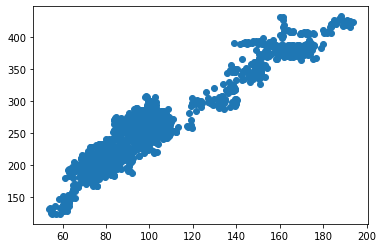

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [23]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [24]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


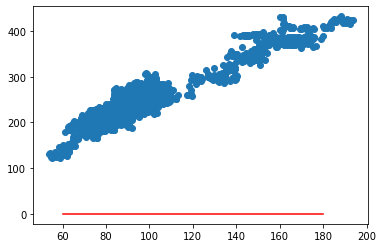

In [25]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [26]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


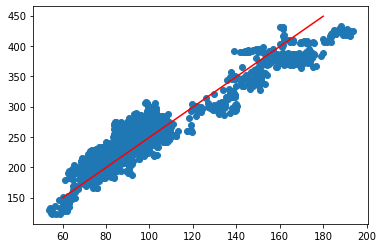

In [27]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [28]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


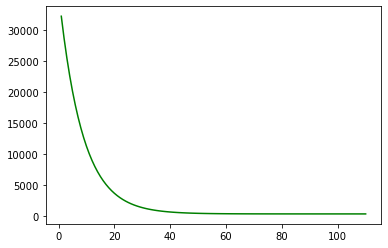

In [30]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [36]:
import numpy as np

In [39]:
x = np.array(x)
y = np.array(y)

In [43]:
reg = LinearRegression().fit(x.reshape(-1,1), y)

In [46]:
reg.predict(x.reshape(-1,1))

array([233.86612042, 235.44323843, 239.61561392, ..., 439.23084148,
       439.96949169, 441.30704747])

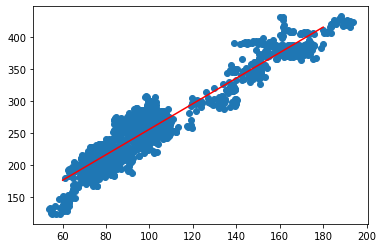

In [48]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0.reshape(-1,1))
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()